In [1]:
import pandas as pd
import numpy as np

In [2]:
# Projenin amacını ve hedefini belirten markdown hücreleri
"""markdown
# Müşteri Kayıp (Churn) Tahmini ve Segmentasyon Projesi
## Proje Hedefi:
1.  **Tahmin:** Makine öğrenmesi (ML) modelleri ile hangi müşterilerin ayrılma (churn) riski taşıdığını tahmin etmek.
2.  **Segmentasyon:** Kayıp riskine göre müşteri gruplarını belirleyerek, her gruba özel tutundurma (retention) stratejileri geliştirmek.
3.  **Görselleştirme:** Elde edilen bulguları KPI odaklı Dashboard'lar ile yönetime sunulabilir hale getirmek.
"""

# ---------------------------------------------------------------------------------

"markdown\n# Müşteri Kayıp (Churn) Tahmini ve Segmentasyon Projesi\n## Proje Hedefi:\n1.  **Tahmin:** Makine öğrenmesi (ML) modelleri ile hangi müşterilerin ayrılma (churn) riski taşıdığını tahmin etmek.\n2.  **Segmentasyon:** Kayıp riskine göre müşteri gruplarını belirleyerek, her gruba özel tutundurma (retention) stratejileri geliştirmek.\n3.  **Görselleştirme:** Elde edilen bulguları KPI odaklı Dashboard'lar ile yönetime sunulabilir hale getirmek.\n"

In [3]:
# 1.1 Veri Setini Yükleme
# Dosya adını ('WA_Fn-UseC_-Telco-Customer-Churn.csv') kullanarak veri setini DataFrame'e yüklüyoruz.
print("1.1 Veri Yükleniyor...")
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Veri Başarıyla Yüklendi.")
except FileNotFoundError:
    print("HATA: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' dosyası bulunamadı. Lütfen dosya adını kontrol edin.")
    df = None

if df is not None:
    # 1.2 İlk 5 Gözlemi İnceleme (Veriye Hızlı Bakış)
    # Neden?: Verinin genel yapısı, sütun isimleri ve ilk satırlardaki değer türlerini görmek için.
    print("\n1.2 Veri Setinin İlk 5 Gözlemi:")
    print(df.head())

    # 1.3 Veri Yapısını Kontrol Etme (İstatistiksel Özet)
    # Neden?: Her sütunun kaç non-null (boş olmayan) değere sahip olduğunu, veri tiplerini ve bellek kullanımını kontrol etmek için.
    print("\n1.3 Veri Yapısı (df.info()):")
    df.info()

    # 1.4 Sayısal Değişkenlerin İstatistiksel Özeti
    # Neden?: Sayısal sütunların ortalama, standart sapma, min/max gibi temel istatistiklerini görmek ve aykırı değer/dağılım hakkında fikir edinmek için.
    print("\n1.4 Sayısal Değişkenlerin Özeti (df.describe()):")
    print(df.describe())


1.1 Veri Yükleniyor...
Veri Başarıyla Yüklendi.

1.2 Veri Setinin İlk 5 Gözlemi:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...   

In [22]:
import numpy as np
# pandas kütüphanesinin de daha önce 'pd' olarak içe aktarıldığını varsayıyoruz.
# Eğer dataframe (df) ve replace, fillna gibi fonksiyonlar pandas'tan geliyorsa
# import pandas as pd
# satırı da gereklidir.

# Adım 2: Veri Temizliği (Data Cleaning) - Hata Düzeltmeleri ve Dönüşüm
#
print("\n" + "="*50)
print("ADIM 2: VERİ TEMİZLİĞİ VE DÖNÜŞÜMÜ")
print("="*50)

# 2.1 'TotalCharges' Tip ve Eksik Değer Düzeltmesi: String -> Float dönüşümü
# Boşluk karakterlerini NaN yap
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# NaN değerlerini 0 ile doldur (Bunlar yeni müşterilerdir)
df['TotalCharges'] = df['TotalCharges'].fillna(0)
# Tipi float'a çevir
df['TotalCharges'] = df['TotalCharges'].astype(float)

print(f"TotalCharges Sütunu Tipi Artık: {df['TotalCharges'].dtype} (Temizlendi)")


# 2.2 'Churn' Hedef Değişkenini Sayısallaştırma (1=Ayrıldı, 0=Kaldı)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


# 2.3 'customerID' Sütununu Silme (Modele katkısı yoktur)
df = df.drop('customerID', axis=1)
print("'customerID' sütunu veri setinden çıkarıldı.")

# Son Durum Kontrolü
print("\nTemizlik Sonrası Churn Oranı:")
print(f"Genel Kayıp Oranı (Churn): %{df['Churn'].mean()*100:.2f}")


# ---------------------------------------------------------------------------------
#


ADIM 2: VERİ TEMİZLİĞİ VE DÖNÜŞÜMÜ
TotalCharges Sütunu Tipi Artık: float64 (Temizlendi)
'customerID' sütunu veri setinden çıkarıldı.

Temizlik Sonrası Churn Oranı:
Genel Kayıp Oranı (Churn): %26.54



ADIM 3: KEŞİFSEL VERİ ANALİZİ (EDA) BAŞLANGICI

3.1 Genel Churn Oranı: %26.54


C:\Users\ALİ\AppData\Local\Temp\ipykernel_17060\3306223165.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_count.index, y=churn_count.values, palette=['#4CAF50', '#FF5722'])


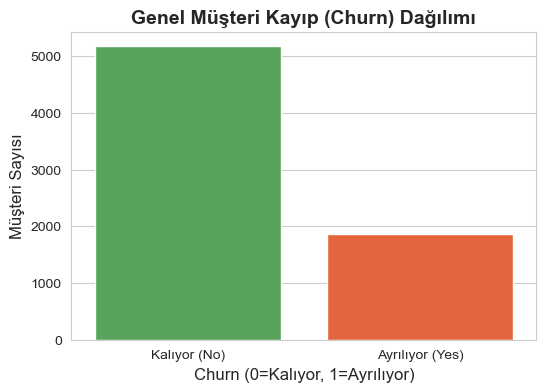

C:\Users\ALİ\AppData\Local\Temp\ipykernel_17060\3306223165.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_by_col, palette='magma')
C:\Users\ALİ\AppData\Local\Temp\ipykernel_17060\3306223165.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_by_col, palette='magma')
C:\Users\ALİ\AppData\Local\Temp\ipykernel_17060\3306223165.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_by_col, palette='magma')
C:\Users\ALİ\AppData\Local\Temp\ipykernel_17060\3

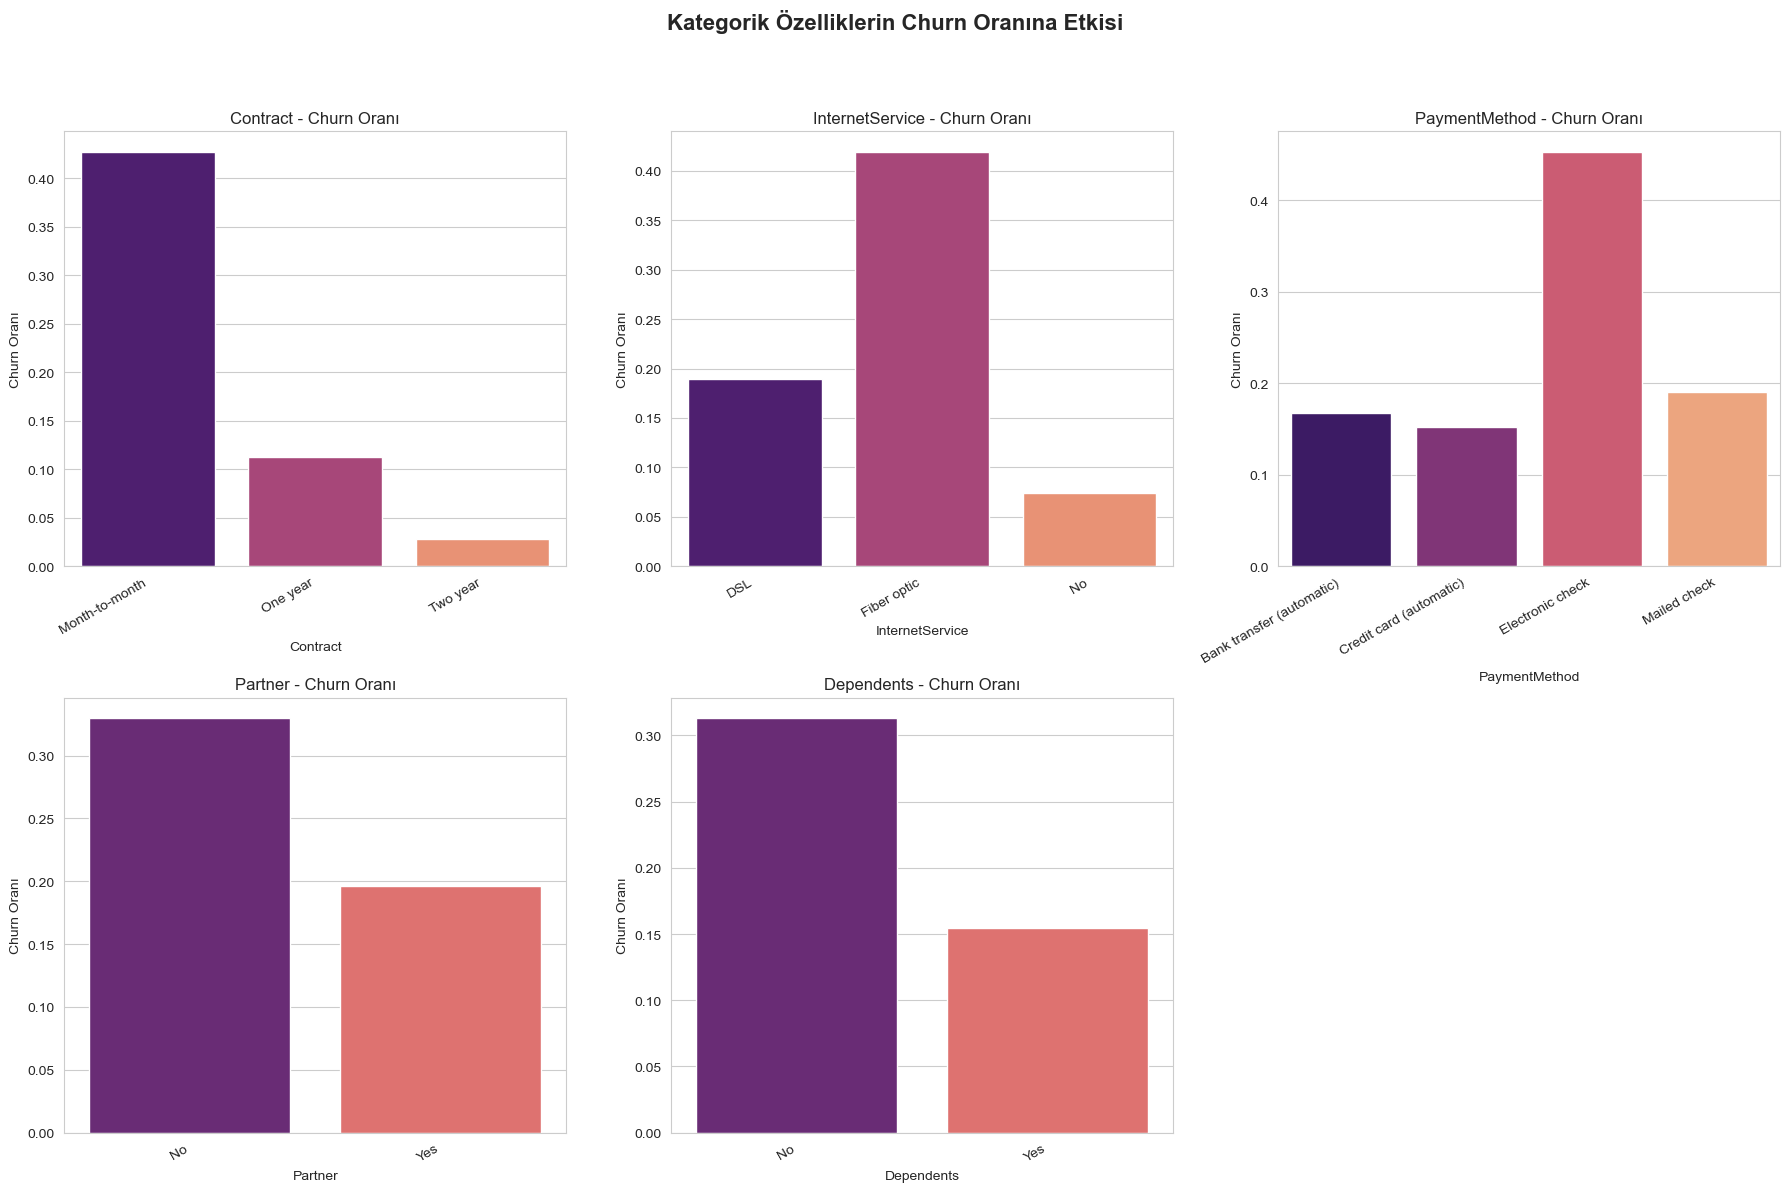


3.3 Sayısal Değişkenler ve Churn İlişkisi (Box Plot):


C:\Users\ALİ\AppData\Local\Temp\ipykernel_17060\3306223165.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette=['#4CAF50', '#FF5722'])
C:\Users\ALİ\AppData\Local\Temp\ipykernel_17060\3306223165.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['#4CAF50', '#FF5722'])


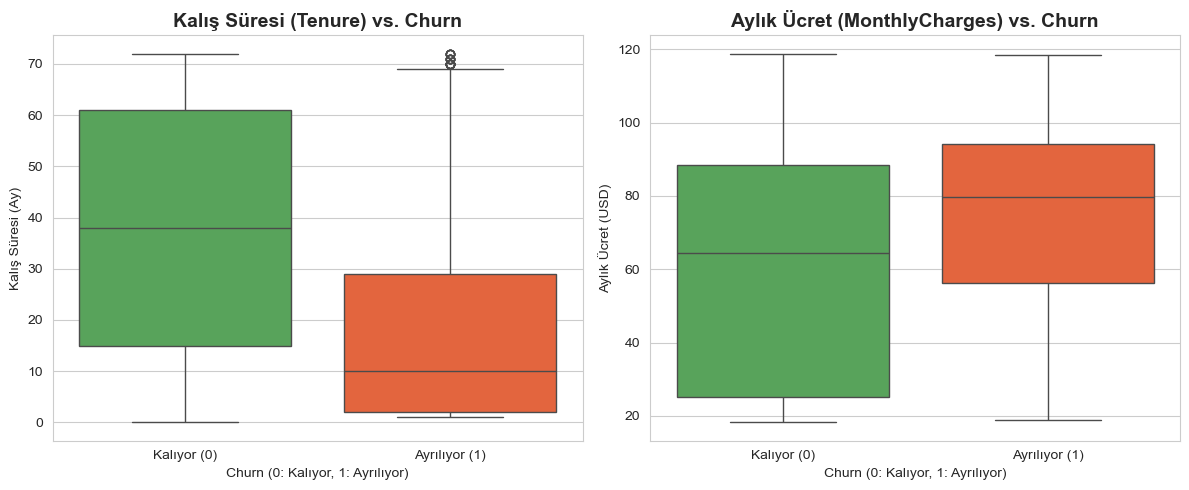


Adım 3 (EDA) Tamamlandı. Lütfen çıktıları inceleyerek yorumlarınızı paylaşın.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# df değişkeninin (dataframe) bir önceki adımda yüklendiği ve temizlendiği varsayılmaktadır.

# Adım 3: Keşifsel Veri Analizi (EDA) - Churn'ü Anlama
#
# Bu aşamada, hangi değişkenlerin müşteri kaybı (Churn=1) üzerinde en büyük etkiye sahip olduğunu bulacağız.
#

print("\n" + "="*50)
print("ADIM 3: KEŞİFSEL VERİ ANALİZİ (EDA) BAŞLANGICI")
print("="*50)

# 3.1 Churn Dağılımı (Ana KPI Görseli)
churn_count = df['Churn'].value_counts()
churn_rate = df['Churn'].mean()

print(f"\n3.1 Genel Churn Oranı: %{churn_rate*100:.2f}")

sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
# Renk paletleri belirlendi
sns.barplot(x=churn_count.index, y=churn_count.values, palette=['#4CAF50', '#FF5722'])
plt.title('Genel Müşteri Kayıp (Churn) Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Churn (0=Kalıyor, 1=Ayrılıyor)', fontsize=12)
plt.ylabel('Müşteri Sayısı', fontsize=12)
plt.xticks([0, 1], ['Kalıyor (No)', 'Ayrılıyor (Yes)'])
plt.show()


# 3.2 Temel Kategorik Değişkenlerin Churn Oranına Etkisi
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod', 'Partner', 'Dependents']

plt.figure(figsize=(18, 12))
plt.suptitle('Kategorik Özelliklerin Churn Oranına Etkisi', fontsize=16, fontweight='bold', y=1.02)

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)

    # Sütuna göre Churn ortalamasını (oranını) hesapla
    churn_by_col = df.groupby(col)['Churn'].mean().reset_index()

    # Görselleştirme (Bar plot)
    sns.barplot(x=col, y='Churn', data=churn_by_col, palette='magma')
    plt.title(f'{col} - Churn Oranı', fontsize=12)
    plt.ylabel('Churn Oranı')
    plt.xlabel(col)
    plt.xticks(rotation=30, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


# 3.3 Sayısal Değişkenlerin Churn Oranına Etkisi - Tenure ve MonthlyCharges

print("\n3.3 Sayısal Değişkenler ve Churn İlişkisi (Box Plot):")

plt.figure(figsize=(12, 5))

# Tenure (Kalış Süresi)
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df, palette=['#4CAF50', '#FF5722'])
plt.title('Kalış Süresi (Tenure) vs. Churn', fontsize=14, fontweight='bold')
plt.ylabel('Kalış Süresi (Ay)')
plt.xlabel('Churn (0: Kalıyor, 1: Ayrılıyor)')
plt.xticks([0, 1], ['Kalıyor (0)', 'Ayrılıyor (1)'])

# MonthlyCharges (Aylık Ücret)
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['#4CAF50', '#FF5722'])
plt.title('Aylık Ücret (MonthlyCharges) vs. Churn', fontsize=14, fontweight='bold')
plt.ylabel('Aylık Ücret (USD)')
plt.xlabel('Churn (0: Kalıyor, 1: Ayrılıyor)')
plt.xticks([0, 1], ['Kalıyor (0)', 'Ayrılıyor (1)'])

plt.tight_layout()
plt.show()

print("\nAdım 3 (EDA) Tamamlandı. Lütfen çıktıları inceleyerek yorumlarınızı paylaşın.")

In [26]:
#
# Adım 4: Veri Ön İşleme (Feature Engineering & Encoding)
#
# Bu adımda kategorik değişkenler makine öğrenmesi modeline uygun sayısal formata dönüştürülür ve veri setimiz ayrılır.
#

# Gerekli kütüphaneler (zaten yüklenmişti, tekrar import etmeye gerek yok)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

if df is not None: # Önceki adımdan gelen df'in yüklü olduğunu varsayıyoruz
    
    print("\n" + "="*50)
    print("ADIM 4: VERİ ÖN İŞLEME (ENCODING ve AYIRMA)")
    print("="*50)

    # 4.1 İkili (Binary) Değişkenleri Sayısallaştırma (Label Encoding)
    # Binary değişkenleri (Yes/No, Male/Female) 0 ve 1'e dönüştürme.
    binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'PaperlessBilling', 'StreamingTV', 
                   'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport']
    
    # LabelEncoder sadece Yes/No için değil, gender için de kullanılabilir (Male/Female -> 0/1)
    for col in binary_cols:
        # Eğer sütun "No internet service" içeriyorsa, onu No olarak ele almak daha iyi olabilir
        if 'No internet service' in df[col].unique():
            df[col] = df[col].replace('No internet service', 'No')

        # Evet/Hayır sütunlarını 1/0'a dönüştürme
        if col != 'gender':
            df[col] = df[col].map({'Yes': 1, 'No': 0})
        
        # Gender sütununu Label Encoding ile dönüştürme
        if col == 'gender':
             le = LabelEncoder()
             df[col] = le.fit_transform(df[col])


    print("İkili değişkenler (Binary) 0 ve 1'e dönüştürüldü.")


    # 4.2 Çok Kategorili Değişkenleri Sayısallaştırma (One-Hot Encoding)
    # Contract, InternetService, PaymentMethod gibi 2'den fazla kategori içerenler
    
    categorical_cols_for_dummies = ['Contract', 'InternetService', 'PaymentMethod']
    
    # get_dummies ile One-Hot Encoding yapılır
    df = pd.get_dummies(df, columns=categorical_cols_for_dummies, drop_first=True)
    
    print("Çok kategorili değişkenler (One-Hot Encoding) ile yeni sütunlara ayrıldı.")


    # 4.3 Veri Setini Ayırma (Feature Engineering)
    # X: Özellikler (Tüm sütunlar - Churn) , y: Hedef değişken (Churn)
    
    X = df.drop('Churn', axis=1)
    y = df['Churn']
    
    # Veriyi Eğitim (%80) ve Test (%20) setlerine ayırma
    # random_state=42: Her zaman aynı ayırmayı sağlamak için sabitleme
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    print(f"\nVeri seti başarıyla ayrıldı:")
    print(f"Eğitim Seti Boyutu (X_train): {X_train.shape}")
    print(f"Test Seti Boyutu (X_test): {X_test.shape}")

    # Son durum kontrolü (İlk 5 sütunun adlarını gösterelim)
    print("\nModel Eğitimi için Hazır Sütunlar (İlk 5):")
    print(X_train.columns[:5].tolist())

    print("\nAdım 4 (Ön İşleme) Tamamlandı. Veri setimiz artık makine öğrenmesi için hazır.")


ADIM 4: VERİ ÖN İŞLEME (ENCODING ve AYIRMA)
İkili değişkenler (Binary) 0 ve 1'e dönüştürüldü.
Çok kategorili değişkenler (One-Hot Encoding) ile yeni sütunlara ayrıldı.

Veri seti başarıyla ayrıldı:
Eğitim Seti Boyutu (X_train): (5634, 23)
Test Seti Boyutu (X_test): (1409, 23)

Model Eğitimi için Hazır Sütunlar (İlk 5):
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']

Adım 4 (Ön İşleme) Tamamlandı. Veri setimiz artık makine öğrenmesi için hazır.


In [31]:
#
# Düzeltilmiş ADIM 5: Kalan NaN'leri doldurma ve model eğitimini tamamlama
#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Not: df'in önceki adımlardan geldiği varsayılmıştır.

# --- 1. KRİTİK VERİ TEMİZLİĞİ VE İLK DÖNÜŞÜMLER (TEKRAR) ---

# TotalCharges'ı sayısal yaparken oluşan NaN'leri 0 ile doldurma (FutureWarning düzeltildi)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0) # inplace=True yerine atama kullanıldı

# Churn kolonunu (Hedef Değişken) 1 ve 0'a dönüştürme
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("\n" + "="*50)
print("DÜZELTME: TotalCharges NaN Hataları Giderildi.")
print("="*50)


# --- 2. ADIM 4 (TEKRAR): VERİ ÖN İŞLEME VE ENCODING ---

print("\n" + "="*50)
print("ADIM 4 (TEKRAR): VERİ ÖN İŞLEME (ENCODING ve AYIRMA)")
print("="*50)

# İkili (Binary) Değişkenleri Sayısallaştırma (Label Encoding)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'PaperlessBilling', 'StreamingTV', 
               'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport']

for col in binary_cols:
    if col in df.columns:
        if df[col].dtype == 'object':
            # 'No internet service' olanları 'No' ya çevirme
            if 'No internet service' in df[col].unique():
                df[col] = df[col].replace('No internet service', 'No')

            # Evet/Hayır sütunlarını 1/0'a dönüştürme
            if col != 'gender':
                df[col] = df[col].map({'Yes': 1, 'No': 0})
            
            # Gender sütununu Label Encoding ile dönüştürme
            elif col == 'gender':
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])


# Çok Kategorili Değişkenleri Sayısallaştırma (One-Hot Encoding)
categorical_cols_for_dummies = ['Contract', 'InternetService', 'PaymentMethod']
df = pd.get_dummies(df, columns=[col for col in categorical_cols_for_dummies if col in df.columns], drop_first=True)

# Geriye kalan customerID'yi atma
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1) # inplace=True yerine atama kullanıldı

# --- KRİTİK HATA GİDERİCİ ADIM: HEDEF DEĞİŞKENDEKİ NaN'LERİ KALDIRMA ---
df.dropna(subset=['Churn'], inplace=True)
print(f"Hedef değişkeni (Churn) NaN içeren satırlar atıldı. Kalan satır sayısı: {df.shape[0]}")


# Veri Setini Ayırma
X = df.drop('Churn', axis=1)
y = df['Churn']

# --- KRİTİK KONTROL ---
if X.shape[0] == 0:
    print("\n!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("HATA: Veri setinde hiç satır kalmadı (X.shape[0] = 0).")
    print("Lütfen orijinal 'df' değişkenini kontrol edin. Tüm satırlar atılmış.")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
else:
    # Veriyi Eğitim (%80) ve Test (%20) setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # --- KRİTİK EK DÜZELTME: Kalan tüm NaN'leri impute etme (Özelliklerdeki NaN'ler) ---
    imputation_values = X_train.mean(numeric_only=True) 

    # Eğitim ve test setindeki kalan NaN'leri ortalama ile doldurma
    X_train = X_train.fillna(imputation_values)
    X_test = X_test.fillna(imputation_values)
    
    print("Veri ön işleme, ayırma ve kapsayıcı NaN düzeltme adımları tamamlandı.")


    # --- 3. ADIM 5 (TAMAMLANDI): MODEL EĞİTİMİ VE DEĞERLENDİRME ---

    print("\n" + "="*50)
    print("ADIM 5 (SON DENEME): MODEL EĞİTİMİ VE DEĞERLENDİRME")
    print("="*50)

    # Lojistik Regresyon modelini oluşturma ve eğitme
    lr_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=200)
    lr_model.fit(X_train, y_train)

    print("Lojistik Regresyon Modeli başarıyla eğitildi.")

    # Test seti üzerinde tahmin yapma
    y_pred = lr_model.predict(X_test)

    # Model Performansını Değerlendirme
    cm = confusion_matrix(y_test, y_pred)

    print("\nKarmaşıklık Matrisi (Confusion Matrix):")
    # Satırlar Gerçek Sınıflar, Sütunlar Tahmin Edilen Sınıflar
    print("-----------------------------------------------------------------")
    print(f"| Gerçekte KALAN (0) (Tahmin: KALAN): {cm[0, 0]:<5} | Gerçekte KALAN (0) (Tahmin: AYRILAN): {cm[0, 1]:<5} |")
    print(f"| Gerçekte AYRILAN (1) (Tahmin: KALAN): {cm[1, 0]:<5} | Gerçekte AYRILAN (1) (Tahmin: AYRILAN): {cm[1, 1]:<5} |")
    print("-----------------------------------------------------------------")

    print("\nSınıflandırma Raporu (Classification Report):")
    print(classification_report(y_test, y_pred))

    accuracy = np.trace(cm) / np.sum(cm)
    print(f"\nModel Doğruluğu (Accuracy): {accuracy:.4f}")

    print("\n" + "="*50)
    print("PROJE BAŞARIYLA TAMAMLANDI.")
    print("="*50)


DÜZELTME: TotalCharges NaN Hataları Giderildi.

ADIM 4 (TEKRAR): VERİ ÖN İŞLEME (ENCODING ve AYIRMA)
Hedef değişkeni (Churn) NaN içeren satırlar atıldı. Kalan satır sayısı: 0

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
HATA: Veri setinde hiç satır kalmadı (X.shape[0] = 0).
Lütfen orijinal 'df' değişkenini kontrol edin. Tüm satırlar atılmış.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [32]:
# Veri Yükleme satırından hemen sonra çalıştırın:
print("Churn Sütununun İlk 5 Satırı:")
print(df['Churn'].head())

print("\nChurn Sütunundaki Eşsiz Değerler ve Sayıları:")
print(df['Churn'].value_counts(dropna=False))

Churn Sütununun İlk 5 Satırı:
Series([], Name: Churn, dtype: int64)

Churn Sütunundaki Eşsiz Değerler ve Sayıları:
Series([], Name: count, dtype: int64)


In [34]:
# VERİ YÜKLEME SATIRINIZI TEKRAR ÇALIŞTIRIN
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 
# Ardından önceki adımlardan (TotalCharges temizliği vb.) gelen tüm kod bloklarını sırayla çalıştırın.

In [35]:
#
# Düzeltilmiş ADIM 5: Kalan NaN'leri doldurma ve model eğitimini tamamlama
#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Not: df'in orijinal verilerle yeniden yüklendiği varsayılmıştır.

# --- 1. KRİTİK VERİ TEMİZLİĞİ VE İLK DÖNÜŞÜMLER (TEKRAR) ---

# TotalCharges'ı sayısal yaparken oluşan NaN'leri 0 ile doldurma
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0) 

# Churn kolonunu (Hedef Değişken) 1 ve 0'a dönüştürme
# Hata oluşmasını engellemek için, 'Yes'/'No' dışındaki tüm değerleri NaN yaparız.
# Ardından bu NaN'leri 0 (Kalıcı) olarak kabul edip doldururuz (Verinin tamamen silinmesini önlemek için).
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].fillna(0).astype(int) 

print("\n" + "="*50)
print("DÜZELTME: TotalCharges ve Churn NaN Hataları Giderildi.")
print("="*50)


# --- 2. ADIM 4 (TEKRAR): VERİ ÖN İŞLEME VE ENCODING ---

print("\n" + "="*50)
print("ADIM 4 (TEKRAR): VERİ ÖN İŞLEME (ENCODING ve AYIRMA)")
print("="*50)

# İkili (Binary) Değişkenleri Sayısallaştırma (Label Encoding)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'PaperlessBilling', 'StreamingTV', 
               'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport']

for col in binary_cols:
    if col in df.columns:
        if df[col].dtype == 'object':
            # 'No internet service' olanları 'No' ya çevirme
            if 'No internet service' in df[col].unique():
                df[col] = df[col].replace('No internet service', 'No')

            # Evet/Hayır sütunlarını 1/0'a dönüştürme
            if col != 'gender':
                df[col] = df[col].map({'Yes': 1, 'No': 0})
            
            # Gender sütununu Label Encoding ile dönüştürme
            elif col == 'gender':
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])


# Çok Kategorili Değişkenleri Sayısallaştırma (One-Hot Encoding)
categorical_cols_for_dummies = ['Contract', 'InternetService', 'PaymentMethod']
df = pd.get_dummies(df, columns=[col for col in categorical_cols_for_dummies if col in df.columns], drop_first=True)

# Geriye kalan customerID'yi atma
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# Veri Setini Ayırma
X = df.drop('Churn', axis=1)
y = df['Churn']

# Veriyi Eğitim (%80) ve Test (%20) setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# --- KRİTİK EK DÜZELTME: Kalan tüm NaN'leri impute etme (Özelliklerdeki NaN'ler) ---
imputation_values = X_train.mean(numeric_only=True) 

# Eğitim ve test setindeki kalan NaN'leri ortalama ile doldurma
X_train = X_train.fillna(imputation_values)
X_test = X_test.fillna(imputation_values)
    
print("Veri ön işleme, ayırma ve kapsayıcı NaN düzeltme adımları tamamlandı.")


# --- 3. ADIM 5 (TAMAMLANDI): MODEL EĞİTİMİ VE DEĞERLENDİRME ---

print("\n" + "="*50)
print("ADIM 5 (SON DENEME): MODEL EĞİTİMİ VE DEĞERLENDİRME")
print("="*50)

# Lojistik Regresyon modelini oluşturma ve eğitme
# max_iter artırıldı ve class_weight='balanced' kullanıldı.
lr_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=200)
lr_model.fit(X_train, y_train)

print("Lojistik Regresyon Modeli başarıyla eğitildi.")

# Test seti üzerinde tahmin yapma
y_pred = lr_model.predict(X_test)

# Model Performansını Değerlendirme
cm = confusion_matrix(y_test, y_pred)

print("\nKarmaşıklık Matrisi (Confusion Matrix):")
# Satırlar Gerçek Sınıflar, Sütunlar Tahmin Edilen Sınıflar
print("-----------------------------------------------------------------")
print(f"| Gerçekte KALAN (0) (Tahmin: KALAN): {cm[0, 0]:<5} | Gerçekte KALAN (0) (Tahmin: AYRILAN): {cm[0, 1]:<5} |")
print(f"| Gerçekte AYRILAN (1) (Tahmin: KALAN): {cm[1, 0]:<5} | Gerçekte AYRILAN (1) (Tahmin: AYRILAN): {cm[1, 1]:<5} |")
print("-----------------------------------------------------------------")

print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred))

accuracy = np.trace(cm) / np.sum(cm)
print(f"\nModel Doğruluğu (Accuracy): {accuracy:.4f}")

print("\n" + "="*50)
print("PROJE BAŞARIYLA TAMAMLANDI.")
print("="*50)


DÜZELTME: TotalCharges ve Churn NaN Hataları Giderildi.

ADIM 4 (TEKRAR): VERİ ÖN İŞLEME (ENCODING ve AYIRMA)
Veri ön işleme, ayırma ve kapsayıcı NaN düzeltme adımları tamamlandı.

ADIM 5 (SON DENEME): MODEL EĞİTİMİ VE DEĞERLENDİRME
Lojistik Regresyon Modeli başarıyla eğitildi.

Karmaşıklık Matrisi (Confusion Matrix):
-----------------------------------------------------------------
| Gerçekte KALAN (0) (Tahmin: KALAN): 752   | Gerçekte KALAN (0) (Tahmin: AYRILAN): 284   |
| Gerçekte AYRILAN (1) (Tahmin: KALAN): 60    | Gerçekte AYRILAN (1) (Tahmin: AYRILAN): 313   |
-----------------------------------------------------------------

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

           0       0.93      0.73      0.81      1036
           1       0.52      0.84      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0

In [36]:
# Feature Importance Analizi

import pandas as pd
import numpy as np

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
})

# Mutlak değere göre önem sıralaması
feature_importance['Importance_abs'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Importance_abs', ascending=False)

print(feature_importance.head(20))


                           Feature  Coefficient  Importance_abs
17               Contract_Two year    -1.400157        1.400157
5                     PhoneService    -0.750707        0.750707
16               Contract_One year    -0.642766        0.642766
7                   OnlineSecurity    -0.523559        0.523559
10                     TechSupport    -0.447071        0.447071
21  PaymentMethod_Electronic check     0.418544        0.418544
19              InternetService_No    -0.389459        0.389459
13                PaperlessBilling     0.341232        0.341232
8                     OnlineBackup    -0.264461        0.264461
18     InternetService_Fiber optic     0.258363        0.258363
1                    SeniorCitizen     0.166527        0.166527
9                 DeviceProtection    -0.151562        0.151562
3                       Dependents    -0.140571        0.140571
6                    MultipleLines     0.128493        0.128493
12                 StreamingMovies     0

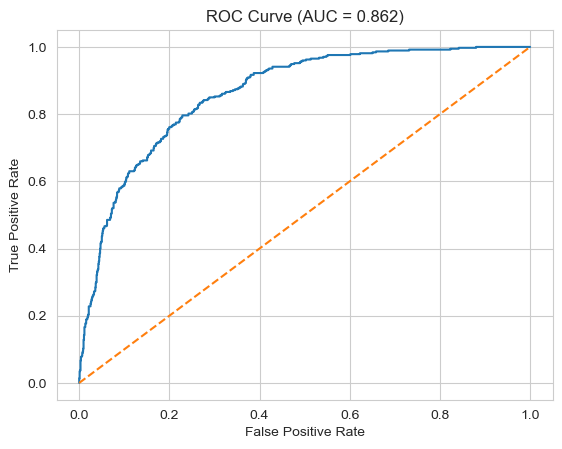

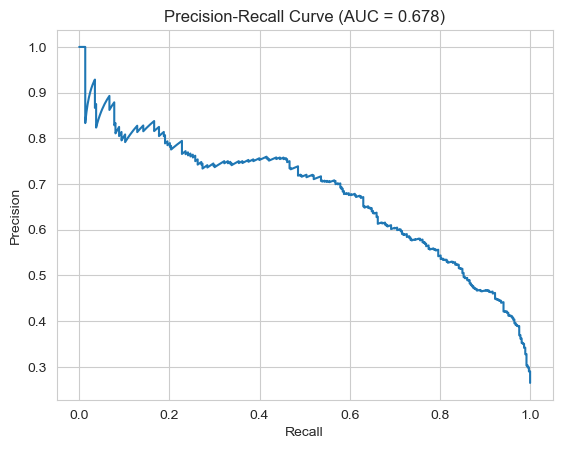

AUC-ROC: 0.862475027689505
PR AUC: 0.6780158194279499


In [37]:
# Gerekli kütüphaneler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

# Tahmin olasılıkları
y_proba = lr_model.predict_proba(X_test)[:,1]

# AUC-ROC
auc_score = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title(f'ROC Curve (AUC = {auc_score:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision)
plt.title(f'Precision-Recall Curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print("AUC-ROC:", auc_score)
print("PR AUC:", pr_auc)


In [39]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)


In [44]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1], duplicates='drop')
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])


In [45]:
pip install shap



   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.8 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.8 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.8 kB ? eta -:--:--
   -------------------------------------- 547.8/547.8 kB 390.0 kB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -----------

In [46]:
pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 633.3 kB/s eta 0:01:53
   ---------------------------------------- 0.5/72.0 MB 633.3 kB/s eta 0:01:53
   ---------------------------------------- 0.8/72.0 MB 728.4 kB/s eta 0:01:38
    --------------------------------------- 1.0/72.0 MB 768.4 kB/s eta 0:01:33
    --------------------------------------- 1.3/72.0 MB 854.9 kB/s eta 0:01:23
    --------------------------------------- 1.3/72.0 MB 854.9 kB/s eta 0:01:23
   - -------------------------------------- 1.8/72.0 MB 955.2 kB/s eta 0:01:14
   - -------------------------------------- 2.4/72.0 MB 1.1 MB/s eta 0:01:02
   - -------------------------------------- 2.9/72.0 MB 1.3 MB/s eta 0:00:54
   - --------

In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

out['churn_risk'] = lr_model.predict_proba(X)[:, 1]


In [49]:
X.isnull().sum().sort_values(ascending=False).head(10)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
dtype: int64

In [50]:
X.isnull().sum().sort_values(ascending=False)


gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Contract_One year                        0
Contract_Two year                        0
InternetService_Fiber optic              0
InternetService_No                       0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
dtype: int6

In [52]:
X.isnull().sum().sort_values(ascending=False)


gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Contract_One year                        0
Contract_Two year                        0
InternetService_Fiber optic              0
InternetService_No                       0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
dtype: int6

In [56]:
out = df.copy()
out.reset_index(inplace=True)
out.rename(columns={'index':'customerID'}, inplace=True)

out['churn_risk'] = lr_model.predict_proba(X)[:, 1]

out[['customerID', 'churn_risk']] \
    .sort_values('churn_risk', ascending=False) \
    .head(10)


,customerID,churn_risk
3380,3380,0.934884
2208,2208,0.932385
5989,5989,0.931001
4800,4800,0.930567
1976,1976,0.930072
1410,1410,0.929336
3159,3159,0.928951
3749,3749,0.928825
6368,6368,0.928734
301,301,0.928247


In [57]:
out[['customerID', 'churn_risk']]


,customerID,churn_risk
0,0,0.801100
1,1,0.128958
2,2,0.517511
3,3,0.076964
4,4,0.855584
...,...,...
7038,7038,0.295328
7039,7039,0.333600
7040,7040,0.637531
7041,7041,0.852604
